Machine Learning - Homework 1 (due Sep. 13)

Problem 1: Legal reasoning (from Murphy 2.2).

Suppose a crime has been committed. Blood is found at the scene for which there is no innocent explanation. It is of a type which is present in 1% of the population.  The defendant is known to have this rare blood type.

a. The prosecutor claims: “There is a 1% chance that the defendant would have the crime blood type if he
were innocent. Thus there is a 99% chance that he guilty”. This is known as the prosecutor’s fallacy.
What is wrong with this argument?

##### Short Answer:

$P(I|B)$ != $P(B|I)$

###### Long Answer:

By this line of reasoning, anyone with the crime blood type could also be argued to have a 99% chance of being guilty.And presumably there is a single(or a few) person that commited the crime and therefore it is nonsensical to argue that everyone with this blood type is extremely likely to have comitted the crime (This would violate the law of total Probability). 

Furthermore, it is a fallacy to conclude that P(B|I) equals P(I|B) becuase you are ignoring both the prior and the evidence term of Bayes' Rule which allows you to 'invert' conditional probabilities. This ratio of prior to evidence determines how much a naive invert of conditional probabilities would be off. In our example P(I)/P(B) is near 100 and when multiplied by the likelihood of .01 we get an almost 1.00 probability of innocence given blood type. This is modeling as if a random person is pulled from the city and is awaiting trial(we are using an uninformitative prior).

b. The defender claims: “The crime occurred in a city of 800,000 people. The blood type would be
found in approximately 8000 people. The evidence has provided a probability of just 1 in 8000 that
the defendant is guilty, and thus has no relevance.” This is known as the defender’s fallacy. What is
wrong with this argument (HINT: What happens to the prior in this case if there is *other* evidence presented)?

##### Short Answer:

This is neglecting all prior evidence for the suspect and assuming anyone in the subset of 8000 is equally likely to be innocent. And it assumes police were pulling out of the 8000 people subpopulation (as if they know who has the blood type and who doesn't) at random and therefore, one in 8000 of the people would be guilty. However, when combined with additional evidence the $\frac{1}{8000}$ will be transformed(multiplied by the prior) to represent our updated belief in guilt and therefore is very much relevant to determine the guilt of the criminal. 

c. Suppose that forensic analysis tells us that that the blood test has 98% sensitivity (true positive rate) and a 1% false positive rate.  Given the information presented in the above two questions, determine the posterior probability the the defendent is guilty, given that the defendent's blood type matches that found at the crime scene *and* that the defendent was one of only 5 people with access to the crime scene *and* that there is no other evidence.  

#### Answer:
##### $0.96$ or $96$% of guilt given evidence

###### Bayes:
$P(G|+) = \frac{P(+|G)P(G)}{P(+)}  =  0.96$

###### Term breakdown:

$P(+)$ is the $P$ of testing positive for the specific blood type. $0.204$

$P(G)$ is the prior probability/belief of guilt.  $0.2$

$P(+|G)$ is the $P$ of testing positive given guilty. $0.98$

###### Sum rule for $P(+)$:

$P(+) = P(+|G)P(G) + P(+|I)P(I)$

$P(+) = 0.98*0.2  +  0.01*0.8  =  0.204 $


Problem 2: Naive Bayes.

One use of the naive Bayes classifier, which is still in practical use today, is as a spam filter.  Consider the corpus of text messages packaged with this homework, which are each labelled as either 'spam' or 'ham'.  In this case, naive Bayes utilizes a Bernoulli model that quantifies the probability of a given word given that the message is either spam or ham.  For example, investigating the text messages here, we find that the word *draw* shows up in spam 27 times, yet in ham only 5.  Thus, we have that
$$ P(X=\mathrm{draw}|Y=\mathrm{ham}) = \frac{5}{5+27}. $$

While this is not particularly strong evidence on its own, we can create a powerful classifier by using the naive assumption in conjunction with all the words in a given message:
$$ P(Y=\mathrm{ham}|X=x) \propto P(Y=\mathrm{ham}) \prod_{i=1}^n P(X_i=x_i|Y=\mathrm{ham}), $$
$$ P(Y=\mathrm{spam}|X=x) \propto P(Y=\mathrm{spam}) \prod_{i=1}^n P(X_i=x_i|Y=\mathrm{spam}), $$
where $x_i$ are the words in a given message. 

Your task is to write such a classifier.  I have taken the somewhat tedious step of parsing the data for you, yielding the variables *word_dictionary*, which contains the ham and spam counts for each word, as well as *training_labels*, which provides the spam/ham labels for each text message.  I have also parsed a set of test data: *test_messages* is a list, each entry containing another list of the words in the text message, as well as *test_labels* which contains the spam/ham label for each message.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Maps from 'ham' or 'spam' strings to zero or one
def mapper(s):
    if s=='spam':
        return 0
    else:
        return 1

# Read in the text file
f = open('SMSSpamCollection','r')
lines = f.readlines()

# Break out the test data
test_lines = lines[:len(lines)//5]
lines = lines[len(lines)//5:]

# Instantiate the frequency dictionary and an array to
# record whether the line is ham or spam
word_dictionary = {}
training_labels = np.zeros(len(lines),dtype=int)

# Loop over all the training messages
for i,l in enumerate(lines):
    # Split into words
    l = l.lower().split()
    # Record the special first word which always ham or spam
    if l[0]=='ham':
        training_labels[i] = 1
    # For each word in the message, record whether the message was ham or spam
    for w in l[1:]:
        # If we've never seen the word before, add a new dictionary entry
        if w not in word_dictionary:
            word_dictionary[w] = [1,1]
        word_dictionary[w][mapper(l[0])] += 1
        
# Loop over the test messages
test_labels = np.zeros(len(test_lines),dtype=int)
test_messages = []
for i,l in enumerate(test_lines):
    l = l.lower().split()
    if l[0]=='ham':
        test_labels[i] = 1
    test_messages.append(l)

Below, I have provided code skeletons.  Your job is to make the code skeletons into an operational naive Bayes spam detector.  (you may discard these skeletons if you would prefer to code this from scratch).  Note that lines where you will need to change the code are marked with a '#!'.

Your first task is train the model:  

In [3]:
# for loop to calculate len of 1 and 0's in training_labels
ham_count =0
spam_count=0
for i in range(len(training_labels)):
    if training_labels[i] == 1:
        ham_count += 1
    else:
        spam_count += 1
#print (ham_count, spam_count)

#What is the prior P(Y=ham) ?
ham_prior = ham_count/(spam_count+ham_count)    #!
print ("ham_prior:")
print (ham_prior)

# What are the class probabilities P(X=word|Y=ham) for each word?
ham_likelihood = {}
for key,val in word_dictionary.items():
    ham_likelihood[key]=val[1]/(val[0]+val[1])

ham_prior:
0.8701793721973095


Your next task is to make predictions on a set of test examples which were held back from the training procedure (see *test_messages* variable).  For each of these messages, compute the ham and spam probabilities.

[[1.26095525e-14 1.00000000e+00]
 [2.65423069e-07 9.99999735e-01]
 [9.99999996e-01 3.80127070e-09]
 [1.90853281e-13 1.00000000e+00]
 [4.51555027e-17 1.00000000e+00]]
0.006662435493857435


Text(0,0.5,'$P(Spam)$')

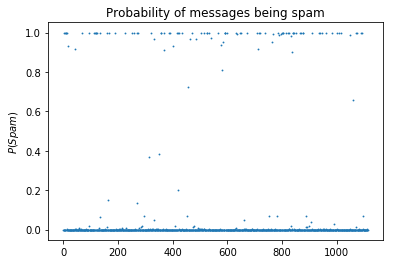

In [10]:
# Where to hold the ham and spam posteriors
posteriors = np.zeros((len(test_lines),2))

# Loop over all the messages in the test set
for i,m in enumerate(test_messages):
    posterior_ham = 1.0 * ham_prior
    posterior_spam = 1.0 *(1-ham_prior)
    #! Don't forget to include the prior!
    # Loop over all the words in each message
    for w in m:
        # #! What is the purpose of this try/except handler?
        try:
            posterior_ham *= ham_likelihood[w]
            posterior_spam *= 1-ham_likelihood[w]
        except KeyError:
            pass
    
    # Notice the normalization factor (denominator) 
    # to turn these into proper probabilities!
    posteriors[i,0] = posterior_spam/(posterior_spam + posterior_ham)
    posteriors[i,1] = posterior_ham/(posterior_spam + posterior_ham)
    
print (posteriors[:5])
print (np.percentile(posteriors[:,0],88))

plt.scatter(range(len(posteriors[:,0])),posteriors[:,0],s=.7)

plt.title("Probability of messages being spam")
plt.ylabel("$P(Spam)$")

#fig = figure()
#ax = ax.subplot(1,1,1)
#ax.scatter(range(len(posteriors[:,1])),posteriors[:,1], s=.7)

Finally, make a ham/spam prediction based on your posterior probabilities.  Compare these to the labels contained in test_labels.  Report the accuracy of your classifier as percentage correct.

In [12]:
# best results with Decision boundary at ~90% likely ham (could optimize!)
# Although I should probably be more conservative to make sure 
# I dont exclude ham, its ok if I include spam once in awhile...
# P(h)>=.1 is probably better for actual use
# We should weight the minimizing # of hams misidentified as spams heavily
# and weight the minimizing # of spams misidentified as hams relatively lightly...

ham_predict = np.array([])
decision_boundary = .1

for i in posteriors[:,1]:
    if i>=decision_boundary:
        ham_predict = np.append(ham_predict, 1)
    else:
        ham_predict = np.append(ham_predict, 0)
        
number_correct=0

for i in np.arange(len(ham_predict)):
    if ham_predict[i] == test_labels[i]:
        number_correct += 1 

In [13]:
print (str(np.round(number_correct/len(ham_predict),decimals=5)))
print ("Percent correct:  " + str(np.round(100.*number_correct/len(ham_predict),decimals=1)))

0.93627
Percent correct:  93.6
